In [ ]:
# Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, log_loss
from scipy.stats import chi2_contingency
import re
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 30.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Read in cleaned dataset
retail_df = pd.read_csv('/work/combined_df.csv')

retail_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age
0,0,451165,Retail,12808,46123.0,MW,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,One,4,NaN
1,1,350106,Retail,10958,43055.0,MW,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1,1,NaN
2,2,384179,Retail,13,46360.0,MW,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1,one,NaN
3,3,402102,Retail,82,6902.0,NE,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1,One,NaN
4,4,417214,Retail,11204,44062.0,MW,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,Office,59710,27517.0,SE,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,Three,10,NaN
5534,5971,615825,Office,5650,89523.0,W,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,One,3,NaN
5535,5972,618912,Office,59178,27517.0,SE,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,Three,12,36.0
5536,5973,558027,Industrial,10500,95370.0,W,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,One,0,NaN


## Logistic regression

We initially tried using logistic regression as our response variable is binary but realized some assumptions were not met (extreme class imbalance & nonlinearity of independent variables and log odds), thereby leading us to try out a different, more suitable model.

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       943
           1       0.00      0.00      0.00       165

    accuracy                           0.85      1108
   macro avg       0.43      0.50      0.46      1108
weighted avg       0.72      0.85      0.78      1108

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

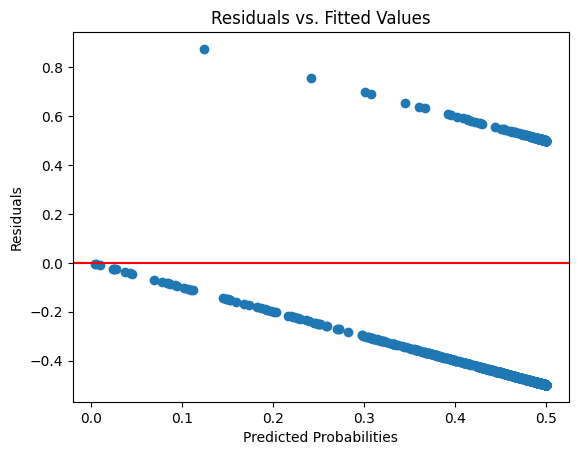

In [ ]:
# Select relevant features and target variable
X = retail_df[['sqft']]
y = retail_df['has_wood_frame']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Apply class weights to control unbalanced data classes
# weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
weights = {0:1, 1:9}

lr = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test))

# Predict probabilities
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# Calculate residuals
residuals = y_test - y_pred_prob

# Plot residuals vs. fitted values
plt.scatter(y_pred_prob, residuals)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()

In [ ]:
# confusion matrix 
cm = confusion_matrix(y_test, pred_test)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, pred_test))

Confusion Matrix : 
 [[943   0]
 [165   0]]
Test accuracy =  0.8510830324909747


Binned residual plot: diagnostic tool for checking the linearity assumption in logistic regression:

In [ ]:
# def binned_residual_plot(y_true, y_pred, num_bins=10):
#     # Calculate residuals
#     residuals = y_true - y_pred
    
#     # Bin residuals based on fitted values
#     bins = np.linspace(np.min(y_pred), np.max(y_pred), num_bins + 1)
#     binned_res = [residuals[(y_pred >= bins[i]) & (y_pred < bins[i+1])] for i in range(len(bins)-1)]
    
#     # Calculate summary statistics for each bin
#     bin_means = [np.mean(bin_res) for bin_res in binned_res]
#     bin_std = [np.std(bin_res) for bin_res in binned_res]
    
#     # Plot binned residuals
#     plt.figure(figsize=(10, 6))
#     plt.errorbar(x=(bins[:-1] + bins[1:]) / 2, y=bin_means, yerr=bin_std, fmt='o', color='b', capsize=5)
#     plt.axhline(y=0, color='r', linestyle='--')
#     plt.xlabel('Fitted Values')
#     plt.ylabel('Mean Residuals')
#     plt.title('Binned Residual Plot')
#     plt.grid(True)
#     plt.show()

# binned_residual_plot(y_test, y_pred_prob, 50)

# def deviance(X, y, model):
#     return 2*log_loss(y, model.predict_proba(X), normalize=False)

# train_deviance = deviance(X_train, y_train, lr)
# test_deviance = deviance(X_test, y_test, lr)

# datasets = ['Training Set', 'Testing Set']
# deviances = [train_deviance, test_deviance]

# # Plotting the deviances
# plt.figure(figsize=(10, 6))
# plt.bar(datasets, deviances, color=['blue', 'orange'])
# plt.xlabel('Dataset')
# plt.ylabel('Deviance')
# plt.title('Deviance for Training and Testing Sets')
# plt.show()

Many of the points are not scattered about zero, nor are they randomly scattered. Additionally, "If the model were true, one would expect about 95% of the residuals to fall inside the error bounds," (https://easystats.github.io/performance/reference/binned_residuals.html#:~:text=Binned%20residual%20plots%20are%20achieved,%2C%20Hill%202007%3A%2097).) which is not shown in the graph.

As such, we can claim that the linearity assumption required for logistic regression is violated.

## Multi-predictor classification (decision tree)

Data preparation for decision tree modeling:

### Converting property type to classes

In [ ]:
def properties(x):
    if x == 'Retail':
        return 1
    elif x in 'Industrial':
        return 2
    elif x in 'Office':
        return 3
    else:
        return 4  # Residential

In [ ]:
retail_df['property_type'] = retail_df['property_type'].apply(properties)

retail_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age
0,0,451165,1,12808,46123.0,MW,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,One,4,NaN
1,1,350106,1,10958,43055.0,MW,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1,1,NaN
2,2,384179,1,13,46360.0,MW,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1,one,NaN
3,3,402102,1,82,6902.0,NE,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1,One,NaN
4,4,417214,1,11204,44062.0,MW,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,3,59710,27517.0,SE,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,Three,10,NaN
5534,5971,615825,3,5650,89523.0,W,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,One,3,NaN
5535,5972,618912,3,59178,27517.0,SE,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,Three,12,36.0
5536,5973,558027,2,10500,95370.0,W,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,One,0,NaN


### Converting region to classes

In [ ]:
def regions(x):
    if x == 'NE':
        return 1
    elif x in 'MW':
        return 2
    elif x in 'SE':
        return 3
    elif x in 'SW':
        return 4
    else:
        return 5

In [ ]:
retail_df['region'] = retail_df['region'].apply(regions)

retail_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age
0,0,451165,1,12808,46123.0,2,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,One,4,NaN
1,1,350106,1,10958,43055.0,2,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1,1,NaN
2,2,384179,1,13,46360.0,2,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1,one,NaN
3,3,402102,1,82,6902.0,1,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1,One,NaN
4,4,417214,1,11204,44062.0,2,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,3,59710,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,Three,10,NaN
5534,5971,615825,3,5650,89523.0,2,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,One,3,NaN
5535,5972,618912,3,59178,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,Three,12,36.0
5536,5973,558027,2,10500,95370.0,2,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,One,0,NaN


### Converting num_floors to integers

In [ ]:
def clean_num_floors(floor):
    # Map textual number descriptions to their numeric counterparts
    text_to_num_mapping = {
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "single": 1,
        "seven": 7,
        "eight": 8

        # Add more mappings as needed
    }
    
    if pd.isnull(floor):
        return None
    
    # Standardize the floor description
    lower_floor_desc = str(floor).lower()
    for word, num in text_to_num_mapping.items():
        lower_floor_desc = lower_floor_desc.replace(word, str(num))
    
    # Extract all numeric values from the description
    numbers = re.findall(r'\d+', lower_floor_desc)
    numbers = [int(num) for num in numbers]
    
    # If no numeric values found (possibly due to textual description not covered), default to 1
    if not numbers:
        return 1
    
    # Return the highest floor number mentioned
    return max(numbers)

# Apply the cleaning function to the 'num_floors' column
retail_df['num_floors'] = retail_df['num_floors'].apply(clean_num_floors)

retail_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age
0,0,451165,1,12808,46123.0,2,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,1.0,4,NaN
1,1,350106,1,10958,43055.0,2,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1.0,1,NaN
2,2,384179,1,13,46360.0,2,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1.0,one,NaN
3,3,402102,1,82,6902.0,1,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1.0,One,NaN
4,4,417214,1,11204,44062.0,2,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,3,59710,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,10,NaN
5534,5971,615825,3,5650,89523.0,2,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,1.0,3,NaN
5535,5972,618912,3,59178,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,12,36.0
5536,5973,558027,2,10500,95370.0,2,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,1.0,0,NaN


In [ ]:
# Temporary dataframe to cap num floors to 4 since any higher means likely 
# errneously taken from the messy raw response.
# 4 also makes sense since a retail building is unlikely to go above 4

retail_floors_df = retail_df[retail_df['num_floors'] <= 4]
retail_floors_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age
0,0,451165,1,12808,46123.0,2,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,1.0,4,NaN
1,1,350106,1,10958,43055.0,2,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1.0,1,NaN
2,2,384179,1,13,46360.0,2,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1.0,one,NaN
3,3,402102,1,82,6902.0,1,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1.0,One,NaN
4,4,417214,1,11204,44062.0,2,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,3,59710,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,10,NaN
5534,5971,615825,3,5650,89523.0,2,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,1.0,3,NaN
5535,5972,618912,3,59178,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,12,36.0
5536,5973,558027,2,10500,95370.0,2,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,1.0,0,NaN


### Converting num_tenants to integers

In [ ]:
# Similar appraoch 
def clean_num_tenants(tenant):
    # Map textual number descriptions to their numeric counterparts
    text_to_num_mapping = {
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "single": 1,
        "seven": 7,
        "eight": 8,
        "nine": 9,
        "ten": 10,
        # in raw dataset, worded tenant numbers don't go higher than 8 anyways
        "none": 0
    }

    if pd.isnull(tenant):
        return None

    lower_tenant_desc = str(tenant).lower()
    for word, num in text_to_num_mapping.items():
        lower_tenant_desc = lower_tenant_desc.replace(word, str(num))

    numbers = re.findall(r'\d+', lower_tenant_desc)
    numbers = [int(num) for num in numbers]

    if not numbers:
        return None

    total_count = sum(numbers)

    # Validate the total count against the legitimate range (0 to 526)
    if total_count > 526:
        return None  # Or consider other handling logic, such as capping at 526
    elif total_count < 0:  # Just in case negative values somehow come into play
        return None

    return total_count

retail_df['num_tenants'] = retail_df['num_tenants'].apply(clean_num_tenants)

retail_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age
0,0,451165,1,12808,46123.0,2,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,1.0,4.0,NaN
1,1,350106,1,10958,43055.0,2,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1.0,1.0,NaN
2,2,384179,1,13,46360.0,2,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1.0,1.0,NaN
3,3,402102,1,82,6902.0,1,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1.0,1.0,NaN
4,4,417214,1,11204,44062.0,2,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,3,59710,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,10.0,NaN
5534,5971,615825,3,5650,89523.0,2,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,1.0,3.0,NaN
5535,5972,618912,3,59178,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,12.0,36.0
5536,5973,558027,2,10500,95370.0,2,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,1.0,0.0,NaN


The largest legitimate tenant count found in the raw dataset is 526 (or at least that row actually had 526 as a response, but we are not certain if it is a mistake or not).

## Decision Tree Classifier of sqft -> wood frame

In [ ]:
# Select relevant features and target variable
X = retail_df[['sqft']]
y = retail_df['has_wood_frame']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)))  # to manage extreme class imbalance

dt.fit(X_train, y_train)

# Predicting on the test data
pred_test = dt.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       943
           1       0.19      0.30      0.23       165

    accuracy                           0.70      1108
   macro avg       0.53      0.54      0.53      1108
weighted avg       0.76      0.70      0.73      1108



## Metrics

The accuracy for model is: 0.703971119133574
The f1 score for the model is: 0.2336448598130841
The roc score for the model is: 0.5311706674378998


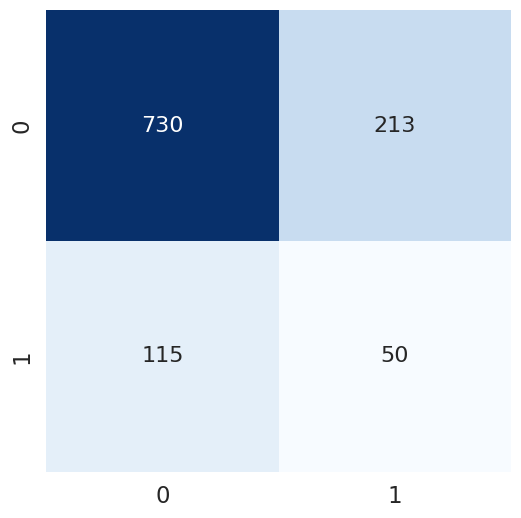

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

print('The accuracy for model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model is:', f1_score(y_test, pred_test))
print('The roc score for the model is:', roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
# Calling function 
conf_matrix(y_test, pred_test)

# Decision Tree Classifier of multiple predictors -> wood frame

In [ ]:
retail_df = retail_df.dropna()

X_ver2 = retail_df[['sqft', 'num_floors', 'num_tenants', 'region', 'property_type']]
y_ver2 = retail_df['has_wood_frame']

X_ver2

,sqft,num_floors,num_tenants,region,property_type
16,2586,1.0,1.0,3,1
17,10640,1.0,1.0,2,1
18,10640,1.0,1.0,2,1
50,10532,1.0,1.0,3,1
142,4265,1.0,1.0,2,1
...,...,...,...,...,...
5514,27843,4.0,8.0,1,3
5518,133778,2.0,1.0,3,2
5519,43200,2535.0,2.0,2,2
5521,20537,1.0,5.0,4,2


Checking assumption of importance of features:

In [ ]:
rename_dict = {
    'sqft': 'Square Feet',
    'num_floors': 'Num of Floors',
    'num_tenants': 'Num of Tenants',
    'region': 'Region',
    'property_type': 'Property Type',
}

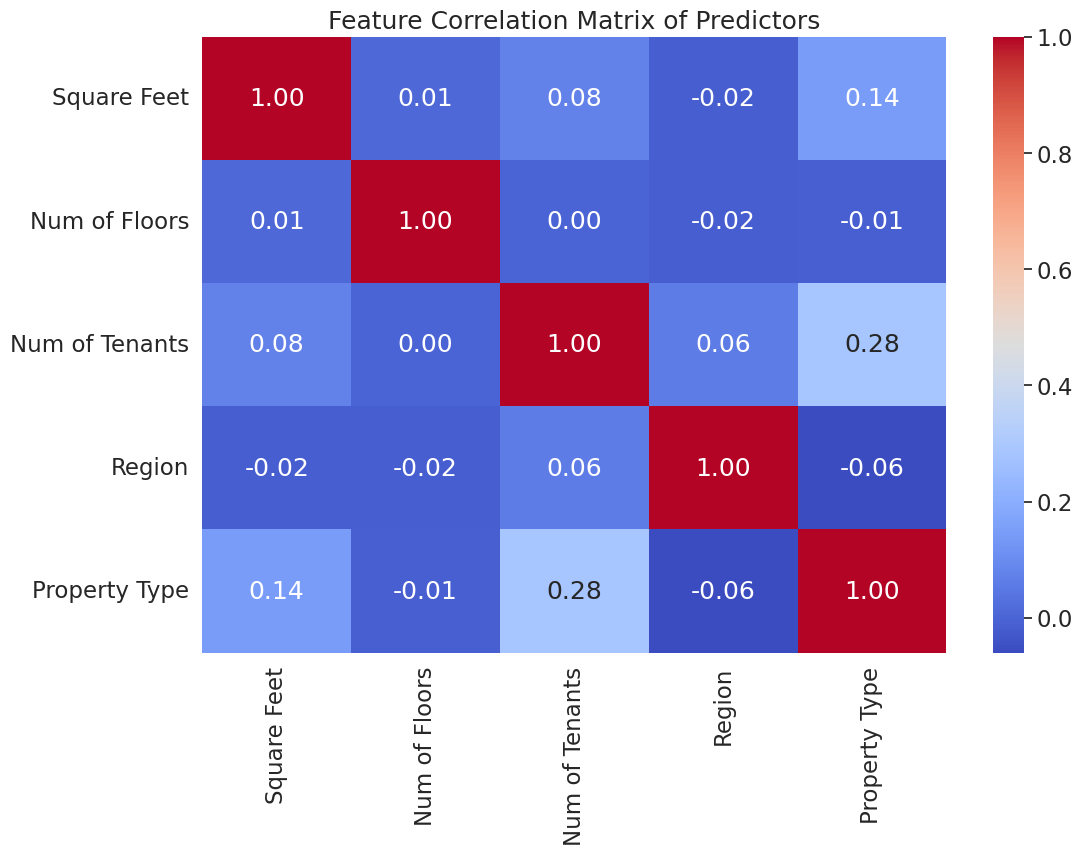

In [ ]:
correlation_matrix = X_ver2.corr()

corr_matrix_renamed = correlation_matrix.rename(index=rename_dict, columns=rename_dict)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_renamed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix of Predictors')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ver2, y_ver2, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
dt1 = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)))  # to manage extreme class imbalance

dt1.fit(X_train, y_train)

# Predicting on the test data
pred_test = dt1.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.35      0.35      0.35        20

    accuracy                           0.75       102
   macro avg       0.60      0.60      0.60       102
weighted avg       0.75      0.75      0.75       102



## Metrics

The accuracy for model is: 0.7450980392156863
The f1 score for the model is: 0.35
The roc score for the model is: 0.5957317073170731


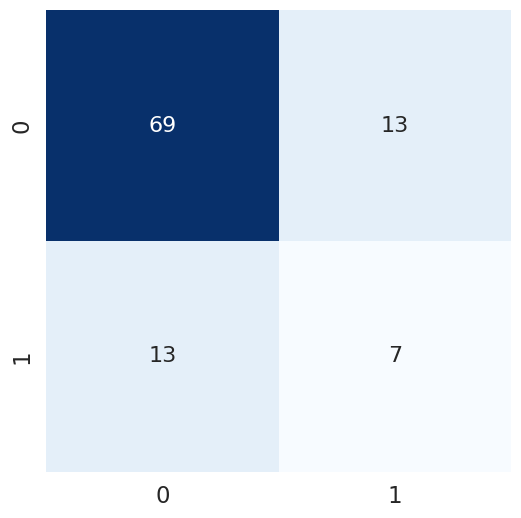

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

print('The accuracy for model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model is:', f1_score(y_test, pred_test))
print('The roc score for the model is:', roc_auc_score(y_test, dt1.predict_proba(X_test)[:,1]))

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
# Calling function 
conf_matrix(y_test, pred_test)

Trying out different methods to account for extreme class imbalance:

In [ ]:
# SAME as above but using SMOTE technique

X_train, X_test, y_train, y_test = train_test_split(X_ver2, y_ver2, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
dt2 = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

dt2.fit(X_train_smote, y_train_smote)

# Predicting on the test data
pred_test = dt2.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.39      0.45      0.42        20

    accuracy                           0.75       102
   macro avg       0.63      0.64      0.63       102
weighted avg       0.77      0.75      0.76       102



The accuracy for model is: 0.7549019607843137
The f1 score for the model is: 0.4186046511627907
The roc score for the model is: 0.6396341463414634


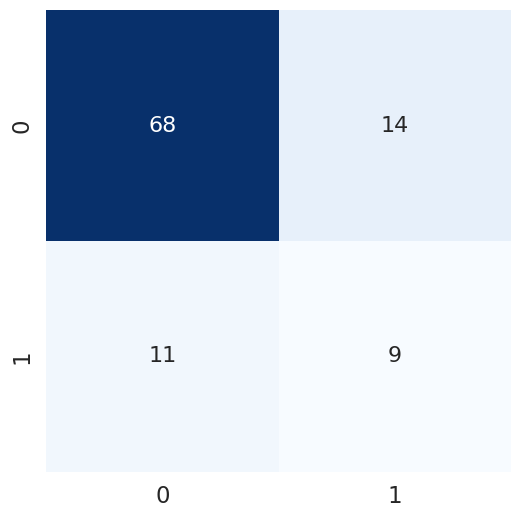

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

print('The accuracy for model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model is:', f1_score(y_test, pred_test))
print('The roc score for the model is:', roc_auc_score(y_test, dt2.predict_proba(X_test)[:,1]))

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
# Calling function 
conf_matrix(y_test, pred_test)

## Our "Successful Model"

In [ ]:
# SAME as above but using balanced random forest classifier

X_train, X_test, y_train, y_test = train_test_split(X_ver2, y_ver2, test_size=0.2, random_state=42)

dt3 = BalancedRandomForestClassifier(random_state=42)
dt3.fit(X_train, y_train)

# Predicting on the test data
pred_test = dt3.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test))

/root/venv/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/root/venv/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/root/venv/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
Classification Report:
   

The accuracy for model is: 0.7156862745098039
The f1 score for the model is: 0.5396825396825397
The roc score for the model is: 0.7801829268292684


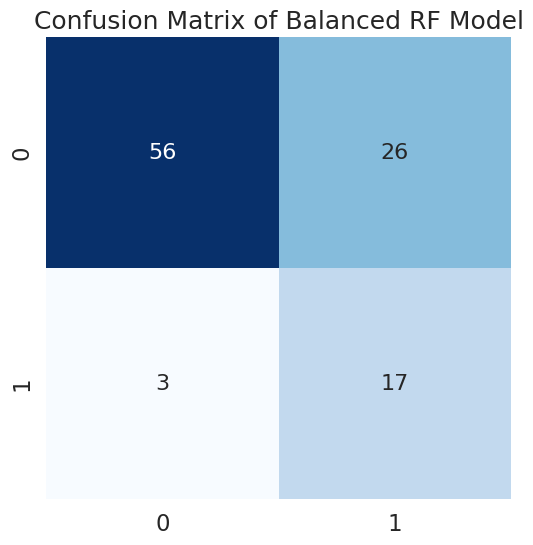

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

print('The accuracy for model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model is:', f1_score(y_test, pred_test))
print('The roc score for the model is:', roc_auc_score(y_test, dt3.predict_proba(X_test)[:,1]))

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix of Balanced RF Model')
    
# Calling function 
conf_matrix(y_test, pred_test)

<hr>

In [ ]:
# SAME as above but using SMOTE & balanced random forest classifier

X_train, X_test, y_train, y_test = train_test_split(X_ver2, y_ver2, test_size=0.2, random_state=42)

dt4 = BalancedRandomForestClassifier(random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

dt4.fit(X_train_smote, y_train_smote)

# Predicting on the test data
pred_test = dt4.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test))

/root/venv/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/root/venv/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/root/venv/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
Classification Report:
   

The accuracy for model is: 0.7647058823529411
The f1 score for the model is: 0.33333333333333326
The roc score for the model is: 0.7554878048780489


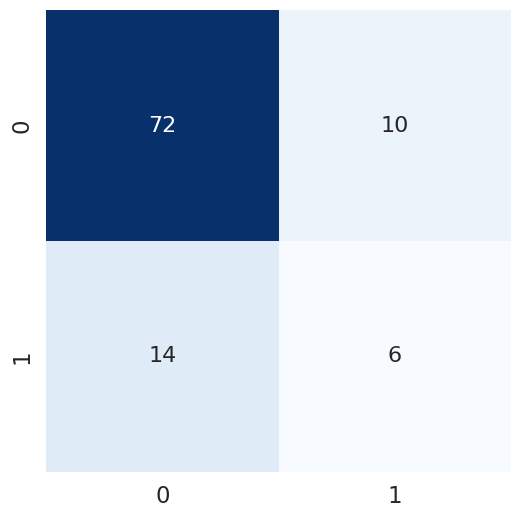

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

print('The accuracy for model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model is:', f1_score(y_test, pred_test))
print('The roc score for the model is:', roc_auc_score(y_test, dt4.predict_proba(X_test)[:,1]))

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
# Calling function 
conf_matrix(y_test, pred_test)

## Feature Importance

In [ ]:
rename_dict = {
    'sqft': 'Square Feet',
    'num_floors': 'Num of Floors',
    'num_tenants': 'Num of Tenants',
    'region': 'Region',
    'property_type': 'Property Type',
}

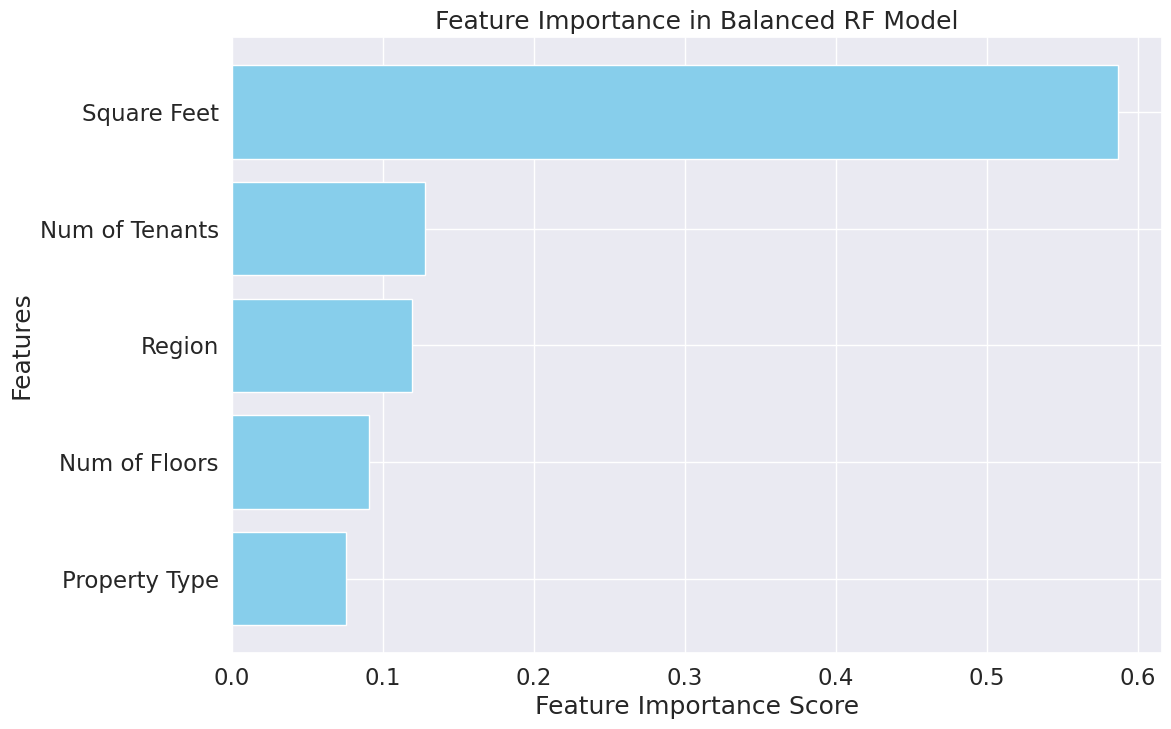

In [ ]:
feature_importances = dt3.feature_importances_

X_ver2_renamed = X_ver2.rename(columns=rename_dict)

feature_importance_df = pd.DataFrame({
    'Feature': X_ver2_renamed.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Balanced RF Model')
plt.gca().invert_yaxis()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa72ad5b-4609-409b-ae7e-8a5fd2e73142' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>